# MCMC simulation of the Ising model

The goal of the tutorial is to implement the Metropolis algorithm to sample configurations from the Ising model on the discrete torus in dimension $d=2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. The case $\beta=0$

A configuration is represented by an array of size $N \times N$. Write a function `ising_0(N)` which returns such an array with cells containing spins independently uniformly distributed in $\{-1,1\}$.

In [2]:
def ising_0(N):
  return np.sign(np.random.randn(N,N))
  # many other solutions are possible!

The function `plot_configuration(conf)` takes in argument a configuration and plots a figure in which spins $+$ are represented by a black pixel and spins $-$ are represented by a white pixel.

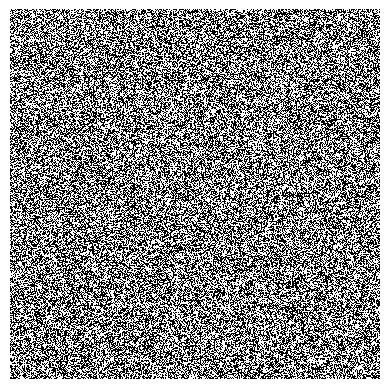

In [3]:
def plot_configuration(conf):
  fig, ax = plt.subplots()
  ax.matshow(conf,cmap="Greys",vmin=-1,vmax=1)
  ax.set_axis_off()

plot_configuration(ising_0(1000))

# 2. Metropolis algorithm

Write a function `sigma(conf,i,j)` which takes in argument a configuration `conf` and two indices `i` and `j` between $0$ and $N-1$, and returns the sum of the spins over the neighbours of the vertex with coordinates $(i,j)$.

We recall that boundary conditions are periodic, so that for example, the neighbours of the vertex $(0,0)$ are $(0,N-1)$, $(0,1)$, $(N-1,0)$ and $(1,0)$. You may therefore fruitfully use the operator `%`.

In [4]:
def sigma(conf,i,j):
  N = np.shape(conf)[0]
  s = conf[i,(j+1)%N] + conf[i,(j-1)%N] + conf[(i+1)%N,j] + conf[(i-1)%N,j]
  return s

Implement the Metropolis algorithm, with the rule of your choice, to return a configuration of size $N \times N$, at inverse temperature $\beta$, in $n_\mathrm{max}$ iterations.

You may take as an initial configuration one returned by `ising_0`.

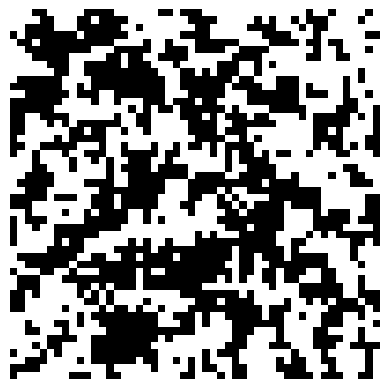

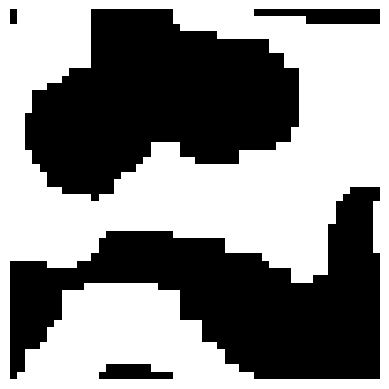

In [5]:
def ising_Barker(N,beta,n_max):
  conf = ising_0(N)

  for n in range(n_max):
    i = np.random.randint(0, N)
    j = np.random.randint(0, N)
    s = sigma(conf,i,j)
    p_plus = 1/(1+np.exp(-2*beta*s))
    if np.random.rand() < p_plus:
      conf[i,j] = 1
    else:
      conf[i,j] = -1

  return conf

# Test with inverse temperatures below and above \beta_c
plot_configuration(ising_Barker(50,.3,10**5))
plot_configuration(ising_Barker(50,3,10**5))

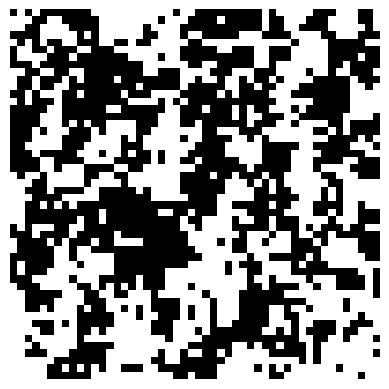

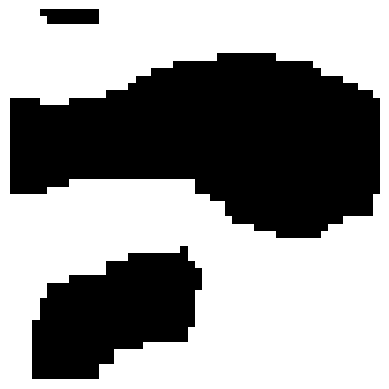

In [6]:
def ising_MH(N,beta,n_max):
  conf = ising_0(N)

  for n in range(n_max):
    i = np.random.randint(0, N)
    j = np.random.randint(0, N)
    s = sigma(conf,i,j)

    xu = conf[i,j]
    U = np.random.rand() # a uniform variable

    if xu < 0 and U < min(1,np.exp(2*beta*s)): conf[i,j]=1
    if xu > 0 and U < min(1,np.exp(-2*beta*s)): conf[i,j]=-1

  return conf

# Test with inverse temperatures below and above \beta_c
plot_configuration(ising_MH(50,.3,10**5))
plot_configuration(ising_MH(50,3,10**5))

# 3. Observation of the phase transition

For any $\beta \geq 0$, we set
$$p_\beta = 1-\mathrm{e}^{-2\beta} \in [0,1].$$
The critical inverse temperature $\beta_\mathrm{c}$ corresponds to
$$p_{\beta_\mathrm{c}} = \frac{\sqrt{2}}{1+\sqrt{2}} \simeq 0,585786.$$

We draw typical configurations, for $N=250$, with several values of $p_\beta$.

In [ ]:
val_p = [.1, .5, .6, .8]

for p in val_p: plot_configuration(ising_MH(250,-.5*np.log(1-p),10**6))